The dataset was taken from https://www.kaggle.com/datasets/spscientist/students-performance-in-exams.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Machine Learning'

Mounted at /content/drive
/content/drive/MyDrive/Machine Learning


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./StudentsPerformance.csv')
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

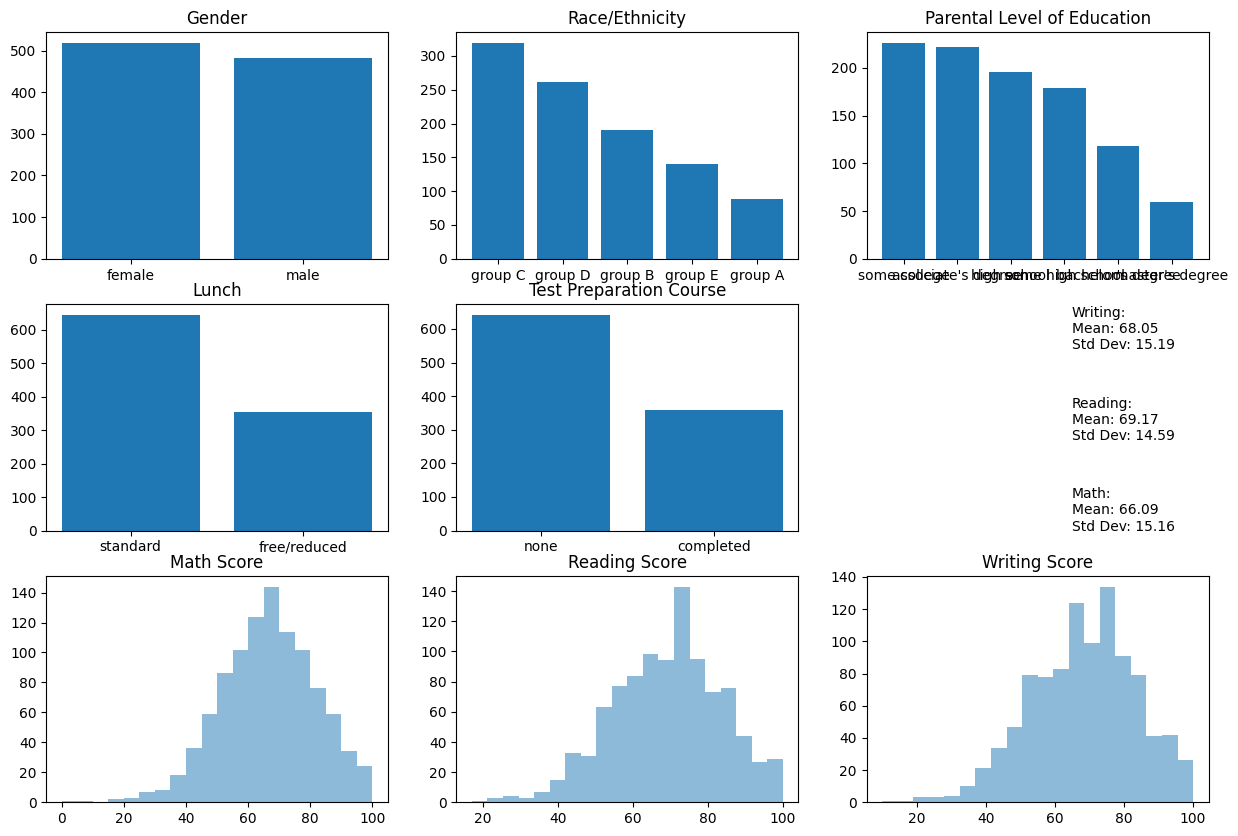

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

gender_counts = df['gender'].value_counts()
axs[0, 0].bar(gender_counts.index, gender_counts.values)
axs[0, 0].set_title('Gender')

ethnicity_counts = df['race/ethnicity'].value_counts()
axs[0, 1].bar(ethnicity_counts.index, ethnicity_counts.values)
axs[0, 1].set_title('Race/Ethnicity')

parental_counts = df['parental level of education'].value_counts()
axs[0, 2].bar(parental_counts.index, parental_counts.values)
axs[0, 2].set_title('Parental Level of Education')

lunch_counts = df['lunch'].value_counts()
axs[1, 0].bar(lunch_counts.index, lunch_counts.values)
axs[1, 0].set_title('Lunch')

prep_counts = df['test preparation course'].value_counts()
axs[1, 1].bar(prep_counts.index, prep_counts.values)
axs[1, 1].set_title('Test Preparation Course')

axs[1, 2].axis('off')

axs[2, 0].hist(df['math score'], bins=20, alpha=0.5)
axs[2, 0].set_title('Math Score')
mean = np.mean(df['math score'])
std = np.std(df['math score'])
axs[1, 2].text(0.6, 0.0, f"Math:\nMean: {mean:.2f}\nStd Dev: {std:.2f}")

axs[2, 1].hist(df['reading score'], bins=20, alpha=0.5)
axs[2, 1].set_title('Reading Score')
mean = np.mean(df['reading score'])
std = np.std(df['reading score'])
axs[1, 2].text(0.6, 0.4, f"Reading:\nMean: {mean:.2f}\nStd Dev: {std:.2f}")

axs[2, 2].hist(df['writing score'], bins=20, alpha=0.5)
axs[2, 2].set_title('Writing Score')
mean = np.mean(df['writing score'])
std = np.std(df['writing score'])
axs[1, 2].text(0.6, 0.8, f"Writing:\nMean: {mean:.2f}\nStd Dev: {std:.2f}")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def plotRelationship(a, b, categories):
  x = df[a]
  y = df[b]

  plt.scatter(x, y)

  plt.xlabel(a)
  plt.ylabel(b)
  plt.title('Relationship between {} and {}'.format(a, b))

  plt.show()

  categories_scores = []

  for c in categories:
    categories_scores.append(df.loc[df[a] == c, b])

  statistics, p_value = stats.ttest_ind(categories_scores[0], categories_scores[1])

  print('p-value:', p_value)

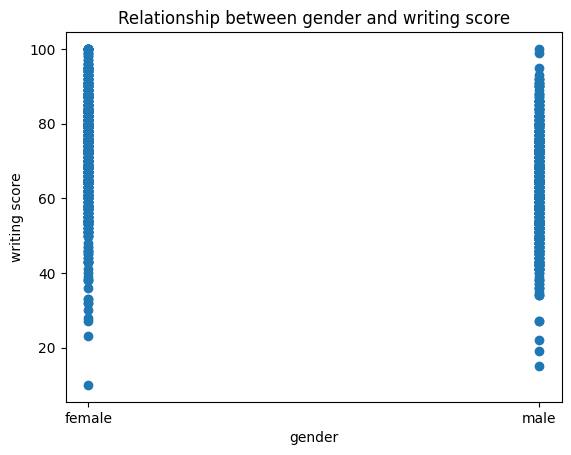

p-value: 2.019877706867934e-22


In [ ]:
plotRelationship("gender", "writing score", ["male", "female"])

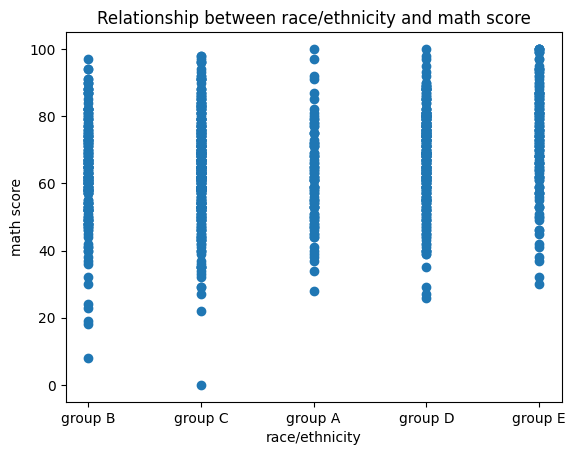

p-value: 0.3503415961659957


In [ ]:
plotRelationship("race/ethnicity", "math score", ["group A", "group B", "group C", "group D", "group E"])

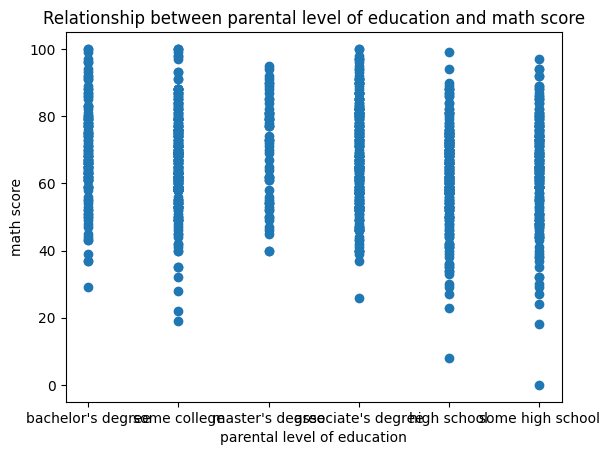

p-value: 0.388108610360687


In [ ]:
plotRelationship("parental level of education", "math score", ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"])

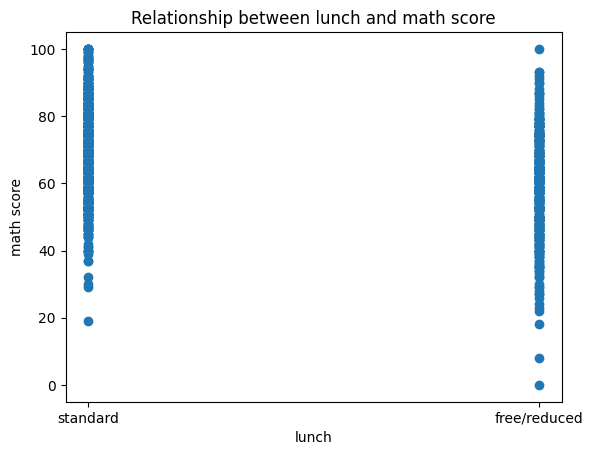

p-value: 2.4131955993137074e-30


In [ ]:
plotRelationship("lunch", "math score", ["standard", "free/reduced"])

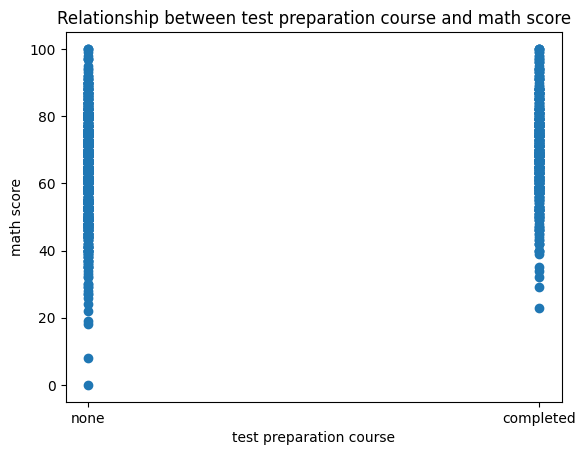

p-value: 1.5359134607147415e-08


In [ ]:
plotRelationship("test preparation course", "math score", ["none", "completed"])

In [ ]:
gender_map = {'male': 0, 'female': 1}
df['gender'] = df['gender'].replace(gender_map)

education_map = {'some high school': 0, 'high school': 1, 'some college': 2, 
                 "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5}
df['parental level of education'] = df['parental level of education'].replace(education_map)

lunch_map = {'free/reduced': 0, 'standard': 1}
df['lunch'] = df['lunch'].replace(lunch_map)

test_map = {'none': 0, 'completed': 1}
df['test preparation course'] = df['test preparation course'].replace(test_map)

In [ ]:
def one_hot_encoding(dataframe, category):
  one_hot_encoded = pd.get_dummies(dataframe[category])
  df_encoded = pd.concat([dataframe, one_hot_encoded], axis=1)
  return df_encoded

In [ ]:
categories = ['race/ethnicity']

for category in categories:
    df = one_hot_encoding(df, category)

<Axes: ylabel='math score'>

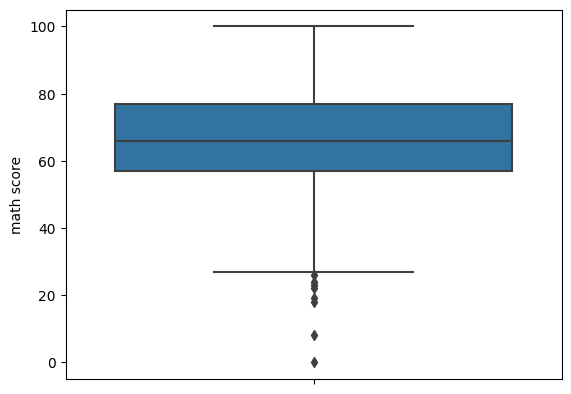

In [ ]:
import seaborn as sns

sns.boxplot(data=df, y="math score")

In [ ]:
Q1 = df["math score"].quantile(0.25)
Q3 = df["math score"].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5*IQR

df = df[df["math score"] < threshold]

In [ ]:
# import numpy as np
# from scipy.spatial.distance import mahalanobis

# X = df[['math score', 'reading score', 'writing score']]
# cov = np.cov(X.T)
# inv_covmat = np.linalg.inv(cov)
# mean = np.mean(X)
# df['mahalanobis'] = [mahalanobis(X.iloc[i], mean, inv_covmat) for i in range(len(X))]

# threshold = df['mahalanobis'].quantile(0.025)
# df = df[df['mahalanobis'] <= threshold]

In [ ]:
df['math score discretized'] = df['math score'].apply(lambda x: 1 if x >= 50 else 0)

We could just use LinearRegression istead of Logistic one with *discretization*

In [ ]:
print(df)

     gender race/ethnicity  parental level of education  lunch  \
0         1        group B                            4      1   
1         1        group C                            2      1   
2         1        group B                            5      1   
3         0        group A                            3      0   
4         0        group C                            2      1   
..      ...            ...                          ...    ...   
995       1        group E                            5      1   
996       0        group C                            1      0   
997       1        group C                            1      0   
998       1        group D                            2      1   
999       1        group D                            2      0   

     test preparation course  math score  reading score  writing score  \
0                          0          72             72             74   
1                          1          69             90    

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


def generate_data_set_selectkbest(K):
  CategoricalColumns = ['race/ethnicity']
  Scores = ['math score', 'reading score', 'writing score', 'math score discretized', 'reading score discretized', 'writing score discretized']
  Class = 'math score'

  CategoricalColumns = [c for c in CategoricalColumns if c in df.columns]
  Scores = [s for s in Scores if s in df.columns]
  Scores = [s for s in Scores if s != Class]

  X = df
  X = X.drop(CategoricalColumns, axis=1)
  X = X.drop(Scores, axis=1)
  X = X.drop(Class, axis=1)
  y = df[Class]

  selector = SelectKBest(chi2, k=K)
  X_new = selector.fit_transform(X, y)

  mask = selector.get_support()
  new_features = []

  for bool, feature in zip(mask, X.columns):
      if bool:
          new_features.append(feature)
  print(f"k {K}: {new_features}")
  return df[new_features];

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

prediction_data_sets = {}
prediction_data_sets['No scores'] = df[['gender', 'parental level of education', 'group A', 'group B', 'group C', 'group D', 'group E', 'lunch', 'test preparation course']]
prediction_data_sets['No scores and no race'] = df[['gender', 'parental level of education', 'lunch', 'test preparation course']]
prediction_data_sets['Scores'] = df[['gender', 'parental level of education', 'group A', 'group B', 'group C', 'group D', 'group E', 'lunch', 'test preparation course', 'reading score', 'writing score']]
prediction_data_sets['Scores and no race'] = df[['gender', 'lunch', 'test preparation course', 'reading score', 'writing score']]
prediction_data_sets['SelectKBest2'] = generate_data_set_selectkbest(2)
prediction_data_sets['SelectKBest5'] = generate_data_set_selectkbest(5)
prediction_data_sets['SelectKBest7'] = generate_data_set_selectkbest(7)

k 2: ['parental level of education', 'group E']
k 5: ['parental level of education', 'lunch', 'group A', 'group B', 'group E']
k 7: ['parental level of education', 'lunch', 'test preparation course', 'group A', 'group B', 'group D', 'group E']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def model_logisitc_regression(prediction_data):
  class_data = df['math score discretized'];
  X_train, X_test, y_train, y_test = train_test_split(prediction_data, class_data, test_size=0.2)
  model = LogisticRegression(max_iter = 2000)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  print('Accuracy:', accuracy)
  return accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def model_decision_tree(prediction_data):
  class_data = df['math score discretized']
  X_train, X_test, y_train, y_test = train_test_split(prediction_data, class_data, test_size=0.2)
  model = DecisionTreeClassifier(random_state=42)
  model.fit(X_train, y_train)

  path = model.cost_complexity_pruning_path(X_train, y_train)
  ccp_alphas = path.ccp_alphas
  ccp_alphas = ccp_alphas[:-1]
  models = []
  for ccp_alpha in ccp_alphas:
      if ccp_alpha < 0:
        continue
      model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
      model.fit(X_train, y_train)
      models.append(model)

  train_scores = [model.score(X_train, y_train) for model in models]
  test_scores = [model.score(X_test, y_test) for model in models]

  best_alpha = ccp_alphas[np.argmax(test_scores)]
  print(f"Best alpha value: {best_alpha}")

  model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  print('Accuracy:', accuracy)
  return accuracy

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def model_linear_regression(prediction_data):
  class_data = df['math score']

  X_train, X_test, y_train, y_test = train_test_split(prediction_data, class_data, test_size=0.2)

  model = LinearRegression()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = model.score(X_test, y_test)
  print('Accuracy:', accuracy)

  mae = mean_absolute_error(y_test, y_pred)
  print('MAE:', mae)

  mse = mean_squared_error(y_test, y_pred)
  print('MSE:', mse)

  rmse = np.sqrt(mse)
  print('RMSE:', rmse)
  return rmse

In [ ]:
logistic_regression_result = {}
decision_tree_result = {}
linear_regression_result = {}

num_iterations = 50

for name, prediction_data in prediction_data_sets.items():
  print(f"====={name}=====")
  print(f"---Logistic Regression---")
  logistic_regression_result[name] = 0
  for i in range(1, num_iterations+1):
    print(f"Iteration {i}:")
    logistic_regression_result[name] += model_logisitc_regression(prediction_data)
  logistic_regression_result[name] /= num_iterations
  print(f"---Decision Tree---")
  decision_tree_result[name] = 0
  for i in range(1, num_iterations+1):
    print(f"Iteration {i}:")
    decision_tree_result[name] += model_decision_tree(prediction_data)
  decision_tree_result[name] /= num_iterations
  print(f"---Linear regression---")
  linear_regression_result[name] = 0
  for i in range(1, num_iterations+1):
    print(f"Iteration {i}:")
    linear_regression_result[name] += model_linear_regression(prediction_data)
  linear_regression_result[name] /= num_iterations

=====No scores=====
---Logistic Regression---
Iteration 1:
Accuracy: 0.865
Iteration 2:
Accuracy: 0.875
Iteration 3:
Accuracy: 0.895
Iteration 4:
Accuracy: 0.87
Iteration 5:
Accuracy: 0.84
Iteration 6:
Accuracy: 0.86
Iteration 7:
Accuracy: 0.86
Iteration 8:
Accuracy: 0.865
Iteration 9:
Accuracy: 0.88
Iteration 10:
Accuracy: 0.87
Iteration 11:
Accuracy: 0.84
Iteration 12:
Accuracy: 0.875
Iteration 13:
Accuracy: 0.88
Iteration 14:
Accuracy: 0.84
Iteration 15:
Accuracy: 0.89
Iteration 16:
Accuracy: 0.86
Iteration 17:
Accuracy: 0.89
Iteration 18:
Accuracy: 0.925
Iteration 19:
Accuracy: 0.845
Iteration 20:
Accuracy: 0.9
Iteration 21:
Accuracy: 0.84
Iteration 22:
Accuracy: 0.87
Iteration 23:
Accuracy: 0.87
Iteration 24:
Accuracy: 0.895
Iteration 25:
Accuracy: 0.835
Iteration 26:
Accuracy: 0.88
Iteration 27:
Accuracy: 0.87
Iteration 28:
Accuracy: 0.885
Iteration 29:
Accuracy: 0.87
Iteration 30:
Accuracy: 0.895
Iteration 31:
Accuracy: 0.885
Iteration 32:
Accuracy: 0.905
Iteration 33:
Accuracy:

In [ ]:
for name, accuracy in logistic_regression_result.items():
  print(f"Logistic regression with {name}: {accuracy}")
print(f"\nLogistic regression average: {np.average(list(logistic_regression_result.values()))}\n")
for name, accuracy in decision_tree_result.items():
  print(f"Decision tree with {name}: {accuracy}")
print(f"\nDecision tree average: {np.average(list(decision_tree_result.values()))}\n")
for name, accuracy in linear_regression_result.items():
  print(f"Linear regression with {name}: (RMSE) {accuracy}")
print(f"\nLinear regression average: {np.average(list(linear_regression_result.values()))}\n")

Logistic regression with No scores: 0.8701000000000001
Logistic regression with No scores and no race: 0.8699999999999999
Logistic regression with Scores: 0.9332
Logistic regression with Scores and no race: 0.9296
Logistic regression with SelectKBest2: 0.8621999999999999
Logistic regression with SelectKBest5: 0.8624
Logistic regression with SelectKBest7: 0.8594000000000002

Logistic regression average: 0.883842857142857

Decision tree with No scores: 0.8758000000000001
Decision tree with No scores and no race: 0.8744999999999997
Decision tree with Scores: 0.9231000000000001
Decision tree with Scores and no race: 0.9265999999999999
Decision tree with SelectKBest2: 0.8670000000000004
Decision tree with SelectKBest5: 0.8677999999999999
Decision tree with SelectKBest7: 0.8641000000000001

Decision tree average: 0.8855571428571428

Linear regression with No scores: (RMSE) 13.273444087893472
Linear regression with No scores and no race: (RMSE) 13.557406650243895
Linear regression with Scores